In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_data = pd.read_csv("data.csv")
df_fuel_pricing = pd.read_csv("fuel pricing.csv")
df_weather = pd.read_csv("weather.csv")

### Displaying top 10 rows and statistics for each dataset

#### Displaying "data.csv file"

In [3]:
df_data.describe()

,Store,Category,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


#### Displaying "fuel pricing.csv"

In [4]:
df_fuel_pricing.head(10)

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
5,1,2010-03-12,2.667
6,1,2010-03-19,2.720
7,1,2010-03-26,2.732
8,1,2010-04-02,2.719
9,1,2010-04-09,2.770


In [5]:
df_fuel_pricing.describe()

,Store,Fuel_Price
count,8190.000000,8190.000000
mean,23.000000,3.405992
std,12.987966,0.431337
min,1.000000,2.472000
25%,12.000000,3.041000
50%,23.000000,3.513000
75%,34.000000,3.743000
max,45.000000,4.468000


#### Displaying "weather.csv"

In [6]:
df_weather.head(10)

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
5,1,2010-03-12,57.79
6,1,2010-03-19,54.58
7,1,2010-03-26,51.45
8,1,2010-04-02,62.27
9,1,2010-04-09,65.86


In [7]:
df_weather.describe()

,Store,Temperature
count,8190.000000,8190.000000
mean,23.000000,59.356198
std,12.987966,18.678607
min,1.000000,-7.290000
25%,12.000000,45.902500
50%,23.000000,60.710000
75%,34.000000,73.880000
max,45.000000,101.950000


## Dealing with missing data

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Category      421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Holiday       421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


##### There are no null rows

In [9]:
avg = df_data["Weekly_Sales"].mean()

for x in df_data.index:
  if df_data.loc[x, "Weekly_Sales"] <= 0:
    df_data.loc[x, "Weekly_Sales"] = avg

df_data[df_data['Weekly_Sales'] <= 0]

,Store,Category,Date,Weekly_Sales,Holiday


##### No 0s displayed in our Weekly_Sales for "data.csv"

In [10]:
df_data.dropna()

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [11]:
df_fuel_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Store       8190 non-null   int64  
 1   Date        8190 non-null   object 
 2   Fuel_Price  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB


In [12]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store        8190 non-null   int64  
 1   Date         8190 non-null   object 
 2   Temperature  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB


## Merging data and store

In [13]:
df_merged = pd.merge(df_data, df_fuel_pricing, on=['Store', 'Date'])
df_final = pd.merge(df_merged, df_weather, on=["Store", "Date"])
df_final["Date"] = pd.to_datetime(df_final['Date'])
df_final.head()

,Store,Category,Date,Weekly_Sales,Holiday,Fuel_Price,Temperature
0,1,1,2010-02-05,24924.50,False,2.572,42.31
1,1,2,2010-02-05,50605.27,False,2.572,42.31
2,1,3,2010-02-05,13740.12,False,2.572,42.31
3,1,4,2010-02-05,39954.04,False,2.572,42.31
4,1,5,2010-02-05,32229.38,False,2.572,42.31


In [14]:
df_Y = df_final.groupby(df_final['Date'])['Weekly_Sales'].sum().sort_values()

## Visualization

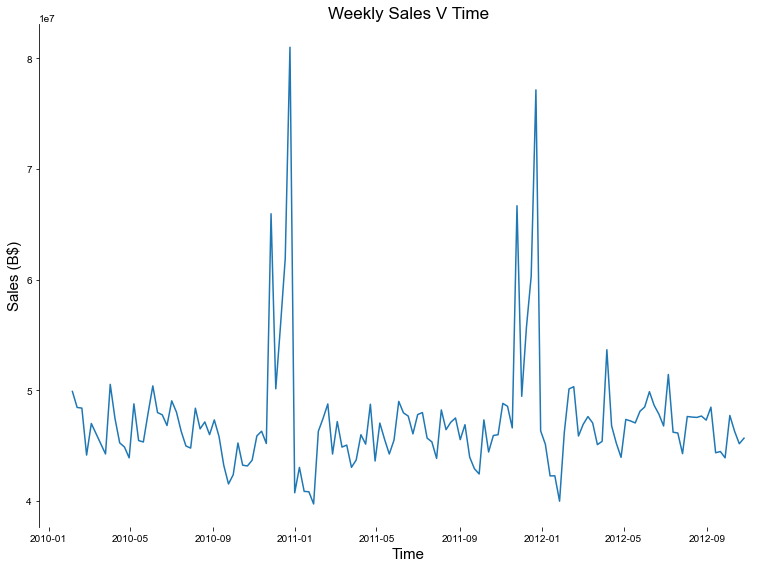

In [15]:
plt.figure(figsize=(11, 8))
sns.lineplot(x=df_Y.index,y=df_Y)
plt.title("Weekly Sales V Time",fontsize = 17)
plt.xlabel("Time",fontsize = 15)
plt.ylabel("Sales (B$)",fontsize = 15)
sns.set_style("whitegrid")
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [16]:
df_M = df_final.groupby(df_final['Category'])['Weekly_Sales'].sum().sort_values().head(10)

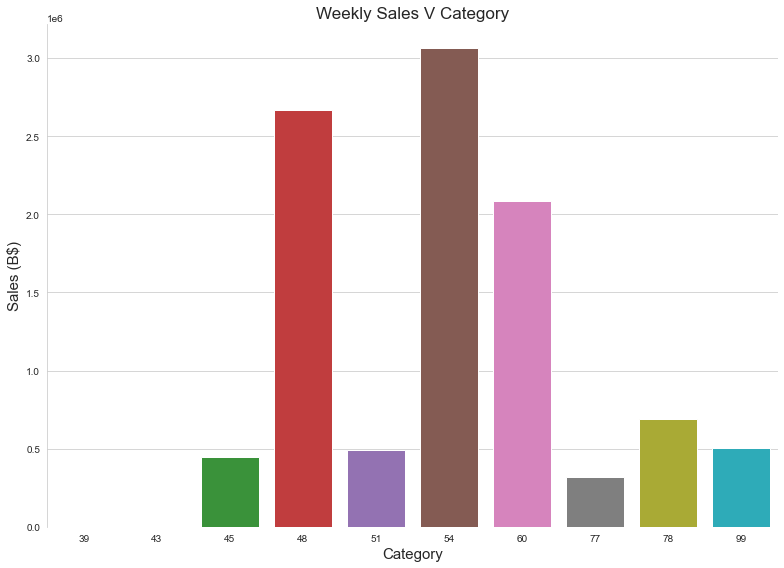

In [17]:
plt.figure(figsize=(11, 8))
sns.barplot(x=df_M.index,y=df_M)
plt.title("Weekly Sales V Category",fontsize = 17)
plt.xlabel("Category",fontsize = 15)
plt.ylabel("Sales (B$)",fontsize = 15)
sns.set_style("whitegrid")
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [18]:
df_S = df_final.groupby(df_final['Store'])['Weekly_Sales'].sum().sort_values().head(10)
df_S

Store
33    3.730416e+07
44    4.372517e+07
5     4.581173e+07
36    5.381288e+07
38    5.533569e+07
3     5.774774e+07
30    6.298869e+07
37    7.433071e+07
16    7.489599e+07
29    7.763825e+07
Name: Weekly_Sales, dtype: float64

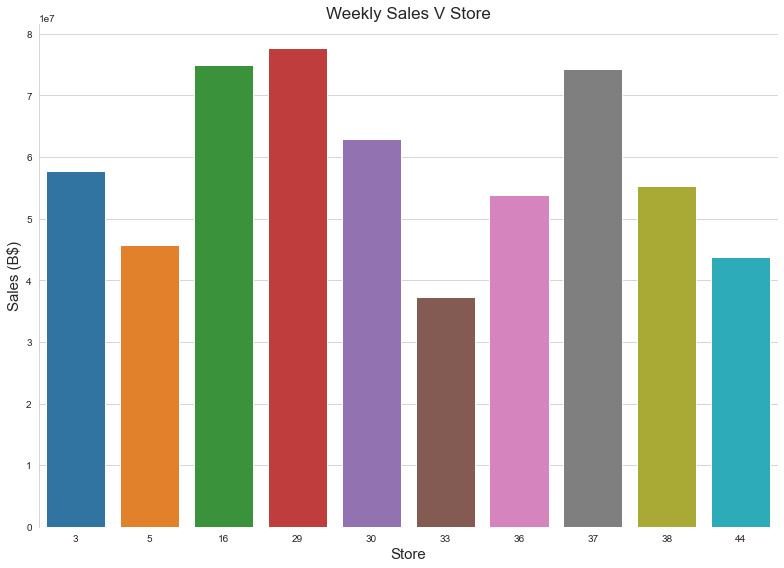

In [19]:
plt.figure(figsize=(11, 8))
sns.barplot(x=df_S.index,y=df_S)
plt.title("Weekly Sales V Store",fontsize = 17)
plt.xlabel("Store",fontsize = 15)
plt.ylabel("Sales (B$)",fontsize = 15)
sns.set_style("whitegrid")
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

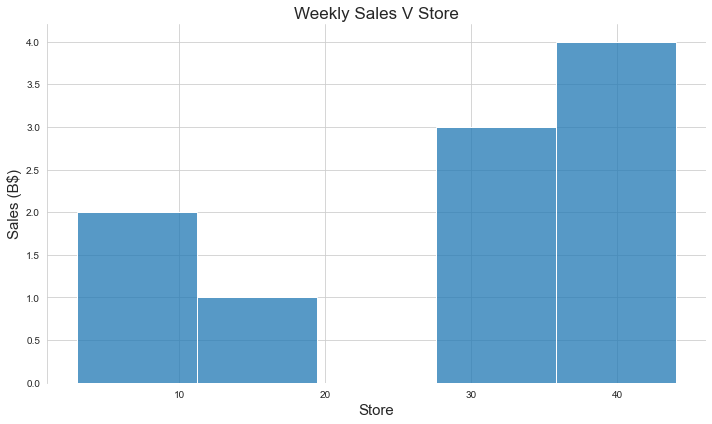

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_S, x="Store")
plt.title("Weekly Sales V Store",fontsize = 17)
plt.xlabel("Store",fontsize = 15)
plt.ylabel("Sales (B$)",fontsize = 15)
sns.set_style("whitegrid")
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

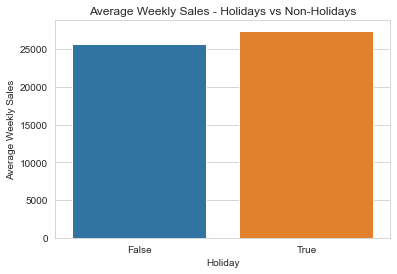

In [21]:
top_ten_stores = df_final.groupby('Store')['Weekly_Sales'].sum().nlargest(10).index
filtered_data = df_final[df_final['Store'].isin(top_ten_stores)]

# Group the data by 'Holiday' and calculate the average weekly sales
average_sales = filtered_data.groupby('Holiday')['Weekly_Sales'].mean().reset_index()

# Plotting the bar plot
sns.barplot(data=average_sales, x='Holiday', y='Weekly_Sales')

# Adding labels and title
plt.xlabel('Holiday')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales - Holidays vs Non-Holidays')

# Displaying the plot
plt.show()

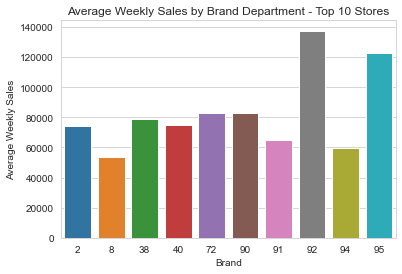

In [22]:
top_ten_stores = df_final.groupby('Store')['Weekly_Sales'].sum().nlargest(10).index
filtered_data = df_final[df_final['Store'].isin(top_ten_stores)]

# Group the data by 'Brand' and calculate the average weekly sales
average_sales = filtered_data.groupby('Category')['Weekly_Sales'].mean().reset_index()

# Sort the average sales in descending order and select the top 10 brands
top_10_brands = average_sales.nlargest(10, 'Weekly_Sales')

# Plotting the bar plot
sns.barplot(data=top_10_brands, x='Category', y='Weekly_Sales')

# Adding labels and title
plt.xlabel('Brand')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Brand Department - Top 10 Stores')

# Displaying the plot
plt.show()

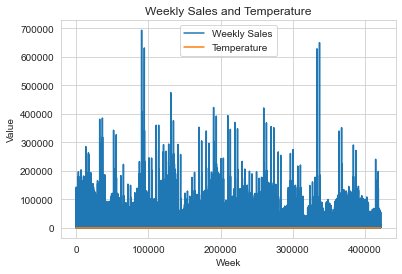

In [23]:
weekly_sales = df_final['Weekly_Sales']
temperature = df_final['Temperature']

# Creating the line plot
plt.plot(weekly_sales, label='Weekly Sales')
plt.plot(temperature, label='Temperature')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Value')
plt.title('Weekly Sales and Temperature')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

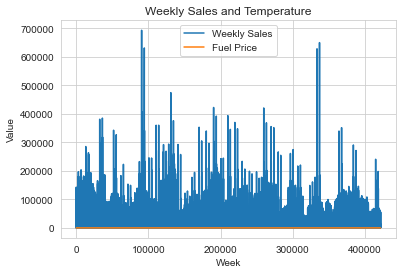

In [24]:
weekly_sales = df_final['Weekly_Sales']
fuel = df_final['Fuel_Price']

# Creating the line plot
plt.plot(weekly_sales, label='Weekly Sales')
plt.plot(fuel, label='Fuel Price')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Value')
plt.title('Weekly Sales and Temperature')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

## Data Modeling

### Splitting the data

In [25]:
df_final = df_final.drop("Date", axis=1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X = df_final.drop('Weekly_Sales', axis=1) # Input features
y = df_final['Weekly_Sales']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
X[['Holiday']] = scaler.fit_transform(X[['Holiday']])


In [28]:
  X.shape

(421570, 5)

Creating Supervised Learning Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating and training the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

Comparing Model Accuracy

In [ ]:
# Making predictions on the testing set
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


# Calculating the mean squared error (MSE) for both models
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)


# Calculating the accuracy (percentage) for both models
lr_accuracy =  (100 * (lr_mse / y_test.mean()))
lr_accuracy = 100 - (100 * (lr_mse / y_test.mean()))

print("Linear Regression Accuracy:", lr_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


